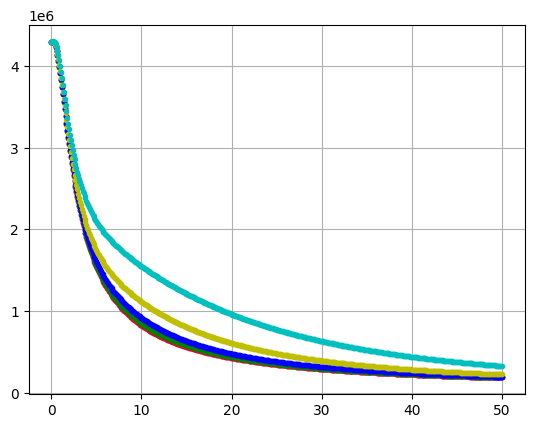

In [33]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

y480_x1 = pd.read_csv('model_pellets_480_1.csv')
y240_x1 = pd.read_csv('model_pellets_240_1.csv')
y120_x1 = pd.read_csv('model_pellets_120_1.csv')
y60_x1 = pd.read_csv('model_pellets_60_1.csv')
y30_x1 = pd.read_csv('model_pellets_30_1.csv')
y15_x1 = pd.read_csv('model_pellets_15_1.csv')

plt.plot(y480_x1['time'], y480_x1['inlet-p'], color = 'm', marker = '.', linestyle = '')
plt.plot(y240_x1['time'], y240_x1['inlet-p'], color = 'r', marker = '.', linestyle = '')
plt.plot(y120_x1['time'], y120_x1['inlet-p'], color = 'g', marker = '.', linestyle = '')
plt.plot(y60_x1['time'], y60_x1['inlet-p'], color = 'b', marker = '.', linestyle = '')
plt.plot(y30_x1['time'], y30_x1['inlet-p'], color = 'y', marker = '.', linestyle = '')
plt.plot(y15_x1['time'], y15_x1['inlet-p'], color = 'c', marker = '.', linestyle = '')
plt.grid()

In [37]:
import math

p_480_1 = y480_x1.at[50, 'inlet-p']
p_240_1 = y240_x1.at[50, 'inlet-p']
p_120_1 = y120_x1.at[50, 'inlet-p']
p_60_1 = y60_x1.at[50, 'inlet-p']
p_30_1 = y30_x1.at[50, 'inlet-p']
p_15_1 = y15_x1.at[50, 'inlet-p']

p = math.log((p_60_1 - p_120_1)/(p_120_1 - p_240_1))/math.log(2)
p_exact = p_240_1 - (p_120_1 - p_240_1)/(2**p-1)
print(f"exact_solution: ", p_exact)

GCI_coarse = (p_60_1/p_exact-1)*100
GCI_medium = (p_120_1/p_exact-1)*100
GCI_fine = (p_240_1/p_exact-1)*100

print(f"GCI_coarse: ", GCI_coarse)
print(f"GCI medium: ", GCI_medium)
print(f"GCI fine: ", GCI_fine)

exact_solution:  1548824.034120404
GCI_coarse:  3.957082575884896
GCI medium:  1.0753266535313388
GCI fine:  0.29221715484073485


In [38]:
import math

p_predicted = pd.DataFrame()
p_predicted['p_480_1'] = y480_x1.loc[:, 'inlet-p']
p_predicted['p_240_1'] = y240_x1.loc[:, 'inlet-p']
p_predicted['p_120_1'] = y120_x1.loc[:, 'inlet-p']
p_predicted['p_60_1'] = y60_x1.loc[:, 'inlet-p']
p_predicted['p_30_1'] = y30_x1.loc[:, 'inlet-p']
p_predicted['p_15_1'] = y15_x1.loc[:, 'inlet-p']


x = (p_predicted['p_120_1'] - p_predicted['p_240_1'])/(p_predicted['p_240_1'] - p_predicted['p_480_1'])
x = x.dropna()
p = x.apply(np.log)/math.log(2)
p_exact = p_predicted['p_480_1'] - (p_predicted['p_240_1']- p_predicted['p_480_1'])/(2**(p)-1)


GCI_coarse = (p_predicted['p_120_1']/p_exact-1)*100
max_GCI = GCI_coarse.max()
print(max_GCI)

GCI_medium = (p_predicted['p_240_1']/p_exact-1)*100
GCI_medium
max_GCI = GCI_medium.max()
print(max_GCI)

GCI_fine = (p_predicted['p_480_1']/p_exact-1)*100
GCI_fine
max_GCI = GCI_fine.max()
print(max_GCI)


3.311445637373933
0.7981847668448117
0.19251435543969908


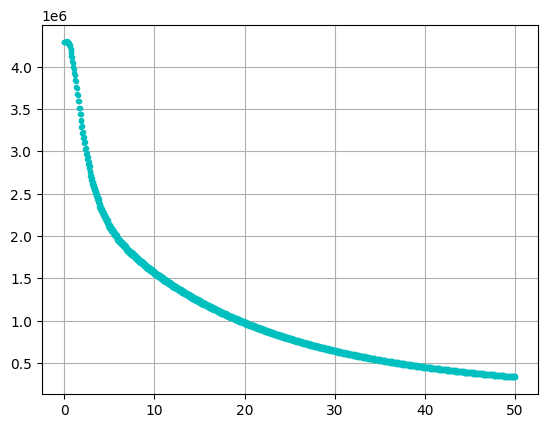

In [35]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

y15_x1 = pd.read_csv('model_pellets_15_1.csv')
y15_x2 = pd.read_csv('model_pellets_15_2.csv')

plt.plot(y15_x1['time'], y15_x1['inlet-p'], color = 'c', marker = '.', linestyle = '')
plt.plot(y15_x2['time'], y15_x2['inlet-p'], color = 'c', marker = '.', linestyle = '')
plt.grid()